In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import ast
from itertools import groupby
import statistics
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from scipy import stats
import statsmodels.api as sm

In [61]:
df = pd.read_csv('train_processed_1.csv')

In [3]:
df.head()

,userID,inAudience,main_group_1,main_group_2,main_group_3,main_group_4,main_group_5,main_group_6,main_group_7,main_group_8,...,main_group_16,main_group_17,main_group_18,main_group_19,main_group_20,main_group_21,main_group_22,main_group_23,main_group_24,main_group_25
0,1,0,0.00000,0.00447,0.01109,0.00248,0.00357,0.00375,0.00130,0.00000,...,0.00000,0.00102,0.00404,0.00000,0.01095,0.01046,0.00000,0.00000,0.00000,0.00592
1,2,0,0.00104,0.00000,0.00000,0.00145,0.00104,0.00000,0.00000,0.01536,...,0.00000,0.00109,0.00000,0.01760,0.00561,0.00699,0.00000,0.00000,0.00407,0.00287
2,3,0,0.00192,0.00242,0.01828,0.00216,0.01308,0.00209,0.00000,0.00000,...,0.00162,0.00000,0.00263,0.00121,0.01732,0.00378,0.00116,0.00156,0.00132,0.00207
3,4,0,0.00000,0.00145,0.00000,0.00000,0.01531,0.00631,0.00481,0.01541,...,0.00000,0.01321,0.00000,0.00240,0.01556,0.00000,0.00000,0.00000,0.00000,0.00154
4,5,0,0.00378,0.00721,0.01114,0.00109,0.00179,0.00127,0.00239,0.00191,...,0.00000,0.00182,0.00144,0.00192,0.00000,0.00521,0.00000,0.00532,0.00000,0.00140


In [41]:
X = df.iloc[:,2:]
y = df['inAudience']
clf = LogisticRegression().fit(X, y)

/Users/bassim/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
propensity_score = clf.predict_proba(X)[:,1]

In [43]:
df['p_score'] = propensity_score

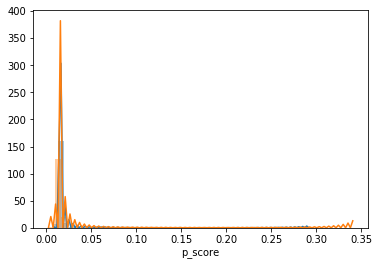

In [22]:
sns.distplot(df[df['inAudience']==1]['p_score'])
sns.distplot(df[df['inAudience']==0]['p_score'])

In [24]:
stats.ttest_ind(df[df['inAudience']==1]['p_score'],df[df['inAudience']==0]['p_score'])

Ttest_indResult(statistic=9.97693803266245, pvalue=1.974129839255016e-23)

In [26]:
np.mean(df[df['inAudience']==1]['p_score'])

0.01605438087001179

In [27]:
np.mean(df[df['inAudience']==0]['p_score'])

0.015226729365543422

In [45]:
df['std_interest'] = df.iloc[:,2:-1].std(axis=1)

In [46]:
df.head()

,userID,inAudience,main_group_1,main_group_2,main_group_3,main_group_4,main_group_5,main_group_6,main_group_7,main_group_8,...,main_group_18,main_group_19,main_group_20,main_group_21,main_group_22,main_group_23,main_group_24,main_group_25,p_score,std_interest
0,1,1,0.00000,0.00447,0.01109,0.00248,0.00357,0.00375,0.00130,0.00000,...,0.00404,0.00000,0.01095,0.01046,0.00000,0.00000,0.00000,0.00592,0.015476,0.003728
1,2,1,0.00104,0.00000,0.00000,0.00145,0.00104,0.00000,0.00000,0.01536,...,0.00000,0.01760,0.00561,0.00699,0.00000,0.00000,0.00407,0.00287,0.015233,0.004976
2,3,1,0.00192,0.00242,0.01828,0.00216,0.01308,0.00209,0.00000,0.00000,...,0.00263,0.00121,0.01732,0.00378,0.00116,0.00156,0.00132,0.00207,0.015101,0.005203
3,4,1,0.00000,0.00145,0.00000,0.00000,0.01531,0.00631,0.00481,0.01541,...,0.00000,0.00240,0.01556,0.00000,0.00000,0.00000,0.00000,0.00154,0.015275,0.006207
4,5,1,0.00378,0.00721,0.01114,0.00109,0.00179,0.00127,0.00239,0.00191,...,0.00144,0.00192,0.00000,0.00521,0.00000,0.00532,0.00000,0.00140,0.015047,0.011436


In [52]:
X = df['std_interest']
y = df['inAudience']
logit = sm.Logit(y, X)

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.182318
         Iterations 10


In [54]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:             inAudience   No. Observations:                96406
Model:                          Logit   Df Residuals:                    96405
Method:                           MLE   Df Model:                            0
Date:                Sat, 02 Nov 2019   Pseudo R-squ.:                  -1.317
Time:                        13:44:02   Log-Likelihood:                -17577.
converged:                       True   LL-Null:                       -7587.3
                                        LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
std_interest  -383.3437      2.698   -142.065      0.000    -388.632    -378.055

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that the

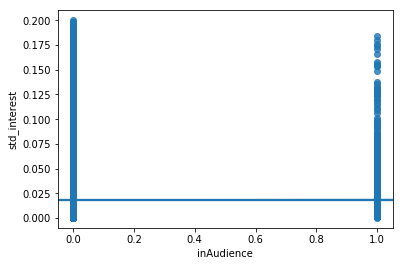

In [60]:
sns.regplot(x=df['inAudience'],y=df['std_interest'])